# **Maximum Likelihood Fitting**

In the last lab, you learn't about the Exploratory Data Analysis (EDA) which have a lot of importance before performing any task on the data. Afterwards, you did linear regression using the Ordinary Least Squares (OLS) method.

Remember when we considered ordinary least squares regression (OLS) we came up with a way of “scoring” how well the line fits the data by summing up the squared residuals. This gave us a “number” of how good a line we had found and then we searched around in the parameters to find the line which minimized the best fit.

We are going to do a similar thing with the log odds regression but instead of computing residuals we will instead convert the predicted values of the regression line into probabilities and compute the “likelihood” of the data under those probabilities.
Let’s start by reloading the hypothetical dataset we considered from the start of the [dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)



# **Lab Assignment:** Maximum Likelihood Estimation and Gradient Descent Optimization
# **Intuition of computing the likelihood**
There are more formal approaches to defining maximum likelihood estimation but lets just use intuition here. We can think of a binary prediction as predicting the outcome of a coin toss. If we have a fair coin (i.e., one that has equal probability of heads and tails) then the probability of say “heads” is 0.5 on a single flip. We can consider this probability the likelihood of getting a heads.
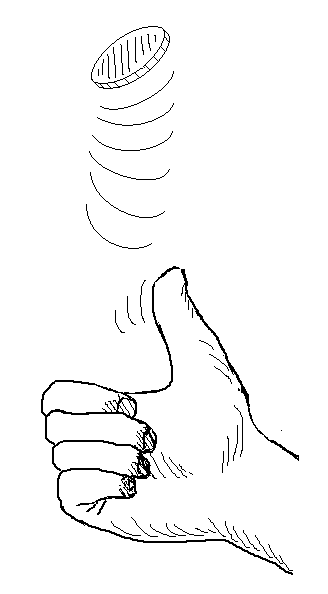


What is the likelihood of getting a particular event or data d.


1. For instance the probability of getting a single coin flip to turn up heads could written?
2. How about if the coin flip came up tails? Then we would have?

So which the probability of a binary event like heads/tails is a function of the outcome and the probability we assigned to that outcome.


We want to move the parameters of our regression line so that we maximize the likelihood of the data. Meaning, we want to try to assign higher probabilities to customers who churned and lower probabilities to customers who didn't churn. Our main limitation here is that we are using the sigmoid function, and so generally, we have this kind of S-shaped curve, and we want to adjust it to match the data.
In an ideal case, we could assign pred_p = 1.0 to customers who churned and pred_p = 0.0 to customers who didn't churn, based on their characteristics, such as usage patterns, billing amount, and customer satisfaction. However, in our dataset, there doesn't appear to be a clear threshold for churning, so all we can do is see that churn probabilities change with different characteristics, but we don't know exactly how to fit this.
So, to summarize where we are so far, we understand that the logistic regression curve will assign a "probability" of churning to each customer in our dataset. We want to try "wiggling" the parameters of the regression around so that we assign high probabilities to customers who actually churned and low probabilities to customers who didn't churn. Our hands are tied in one way, which is that since we are using a logistic regression model, we generally can only adjust this S-shaped probability curve.

# **Fitting all the data with the joint likelihood**
However, there are two remaining pieces to the puzzle. The first is how we assess all the customers at once. The model predicts a log-odds for each customer in our dataset, which we convert to a probability. But then we want to do this for all the customers in our dataset together. In other words, we aren’t assessing the probability of one customer churning; we are doing it for all the customers in our dataset.
Luckily, the probability of a bunch of independent data is simply the multiplication of all the probabilities. You can think of it as: "What is the probability of Customer 1 churning AND Customer 2 not churning AND Customer 3 churning, AND so on?" By multiplying these probabilities together, we can get an overall likelihood of our model given the data.


## **Objective:**
 To understand and implement Maximum Likelihood Estimation (MLE) to find a probability distribution that fits the given data and optimize the likelihood function using the Gradient Descent **(Batch, Mini-batch and Stochastic)** technique.

# Task 1: **EDA**

Do the necessary EDA carefully this time. The dataset already consists of the training portion and testing portion in two different files. Hence, no data splitting is required here.

Treat it as a classification problem. The last column being the dependent variable. For this Task 1, do the exhaustive Exploratory Data Analysis (EDA) with all possible visualization as done in the Lab 1.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_df = pd.read_csv('/content/customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

train_df.head()



,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


from matplotlib import pyplot as plt
_df_25['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('Subscription Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('Contract Length').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='index', y='CustomerID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Tenure', y='Usage Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Subscription Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Subscription Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Contract Length')):
  _plot_series(series, series_name, i)
  fig.legend(title='Contract Length', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Tenure')

from matplotlib import pyplot as plt
_df_40['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['Tenure'].plot(kind='line', figsize=(8, 4), title='Tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Subscription Type'].value_counts()
    for x_label, grp in _df_44.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Subscription Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Contract Length'].value_counts()
    for x_label, grp in _df_45.groupby('Subscription Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Subscription Type')
_ = plt.ylabel('Contract Length')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='index', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['Subscription Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='index', y='Subscription Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['Contract Length'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='index', y='Contract Length', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='CustomerID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [16]:
train_df.shape

(440833, 12)

In [17]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


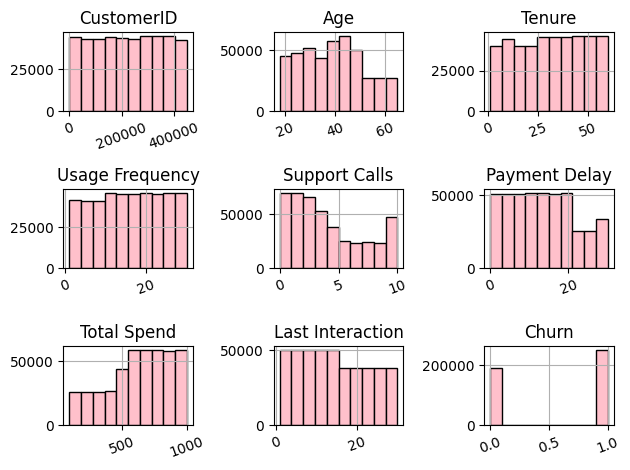

In [18]:
df_numeric = train_df.select_dtypes(include=np.number)
print(df_numeric.columns)
df_numeric.hist(xrot=20,edgecolor='black' , color='pink')
plt.tight_layout()
plt.show()

In [19]:
print(train_df.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


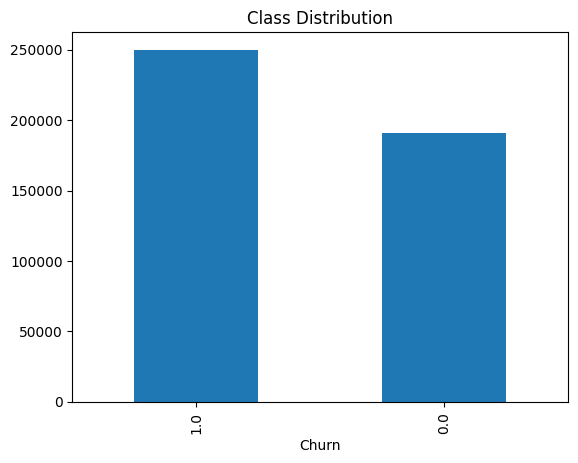

In [20]:
train_df['Churn'].value_counts().plot(kind='bar', title='Class Distribution');

In [21]:
train_df=train_df.drop(['CustomerID'], axis=1)
test_df=test_df.drop(['CustomerID'], axis=1)
train_df.head()


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [22]:
test_df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


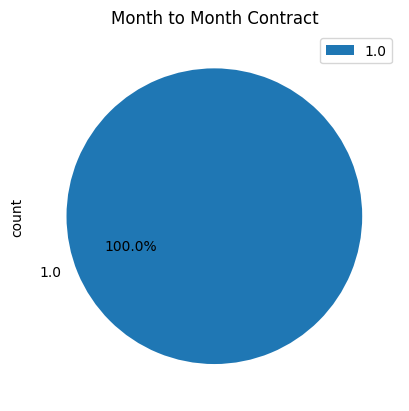

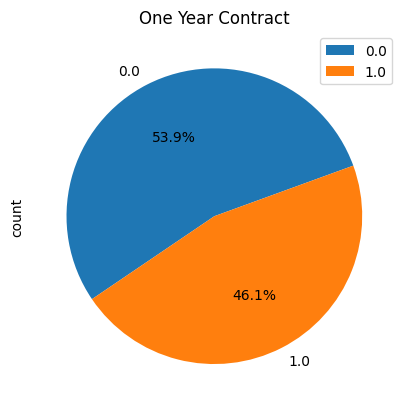

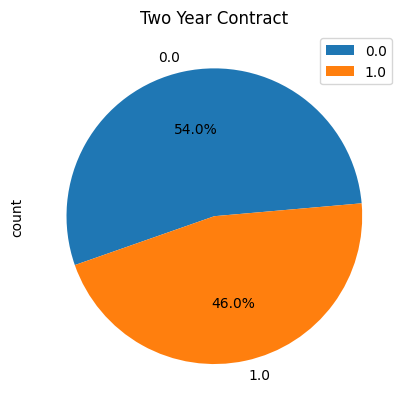

In [23]:
pie_Contract_m2m = pd.DataFrame(train_df[train_df['Contract Length'] == "Monthly"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(train_df[train_df['Contract Length'] == "Annual"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(train_df[train_df['Contract Length'] == "Quarterly"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

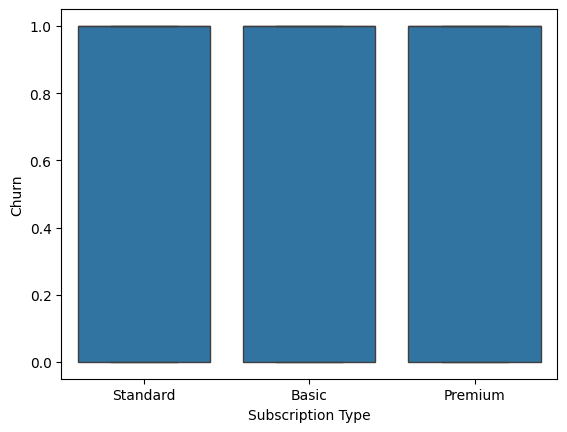

In [24]:
sns.boxplot(x = 'Subscription Type', y = 'Churn', data = train_df)
plt.show()

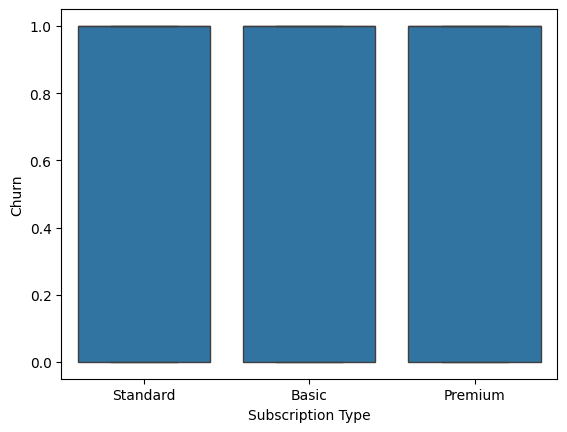

In [25]:
sns.boxplot(x = 'Subscription Type', y = 'Churn', data = train_df)
plt.show()

In [26]:
dummy1 = pd.get_dummies(train_df[['Contract Length', 'Subscription Type', 'Gender']], drop_first=True).astype('int64')
train_df = pd.concat([train_df, dummy1], axis=1)


In [27]:
train_df=train_df.drop(['Contract Length', 'Subscription Type', 'Gender'], axis=1)

In [28]:
train_df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Premium,Subscription Type_Standard,Gender_Male
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,0,1,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,0,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,0,1,0,0,0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,1,0,0,1,1
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,0,1


In [29]:
dummy1 = pd.get_dummies(test_df[['Contract Length', 'Subscription Type', 'Gender']], drop_first=True).astype('int64')
test_df = pd.concat([test_df, dummy1], axis=1)
test_df=test_df.drop(['Contract Length', 'Subscription Type', 'Gender'], axis=1)
test_df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Premium,Subscription Type_Standard,Gender_Male
0,22,25,14,4,27,598,9,1,1,0,0,0,0
1,41,28,28,7,13,584,20,0,1,0,0,1,0
2,47,27,10,2,29,757,21,0,0,0,1,0,1
3,35,9,12,5,17,232,18,0,0,1,1,0,1
4,53,58,24,9,2,533,18,0,0,0,0,1,0


In [30]:
train_df.isnull().sum()

,0
Age,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Total Spend,1
Last Interaction,1
Churn,1
Contract Length_Monthly,0
Contract Length_Quarterly,0


In [31]:
train_df = train_df[~np.isnan(train_df['Age'])]
train_df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Premium,Subscription Type_Standard,Gender_Male
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,0,1,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,0,0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,0,1,0,0,0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,1,0,0,1,1
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,0,1


In [32]:
round(100 * (train_df.isnull().sum() / len(train_df.index)), 2)

,0
Age,0.0
Tenure,0.0
Usage Frequency,0.0
Support Calls,0.0
Payment Delay,0.0
Total Spend,0.0
Last Interaction,0.0
Churn,0.0
Contract Length_Monthly,0.0
Contract Length_Quarterly,0.0


In [33]:
corrr=train_df.corr()

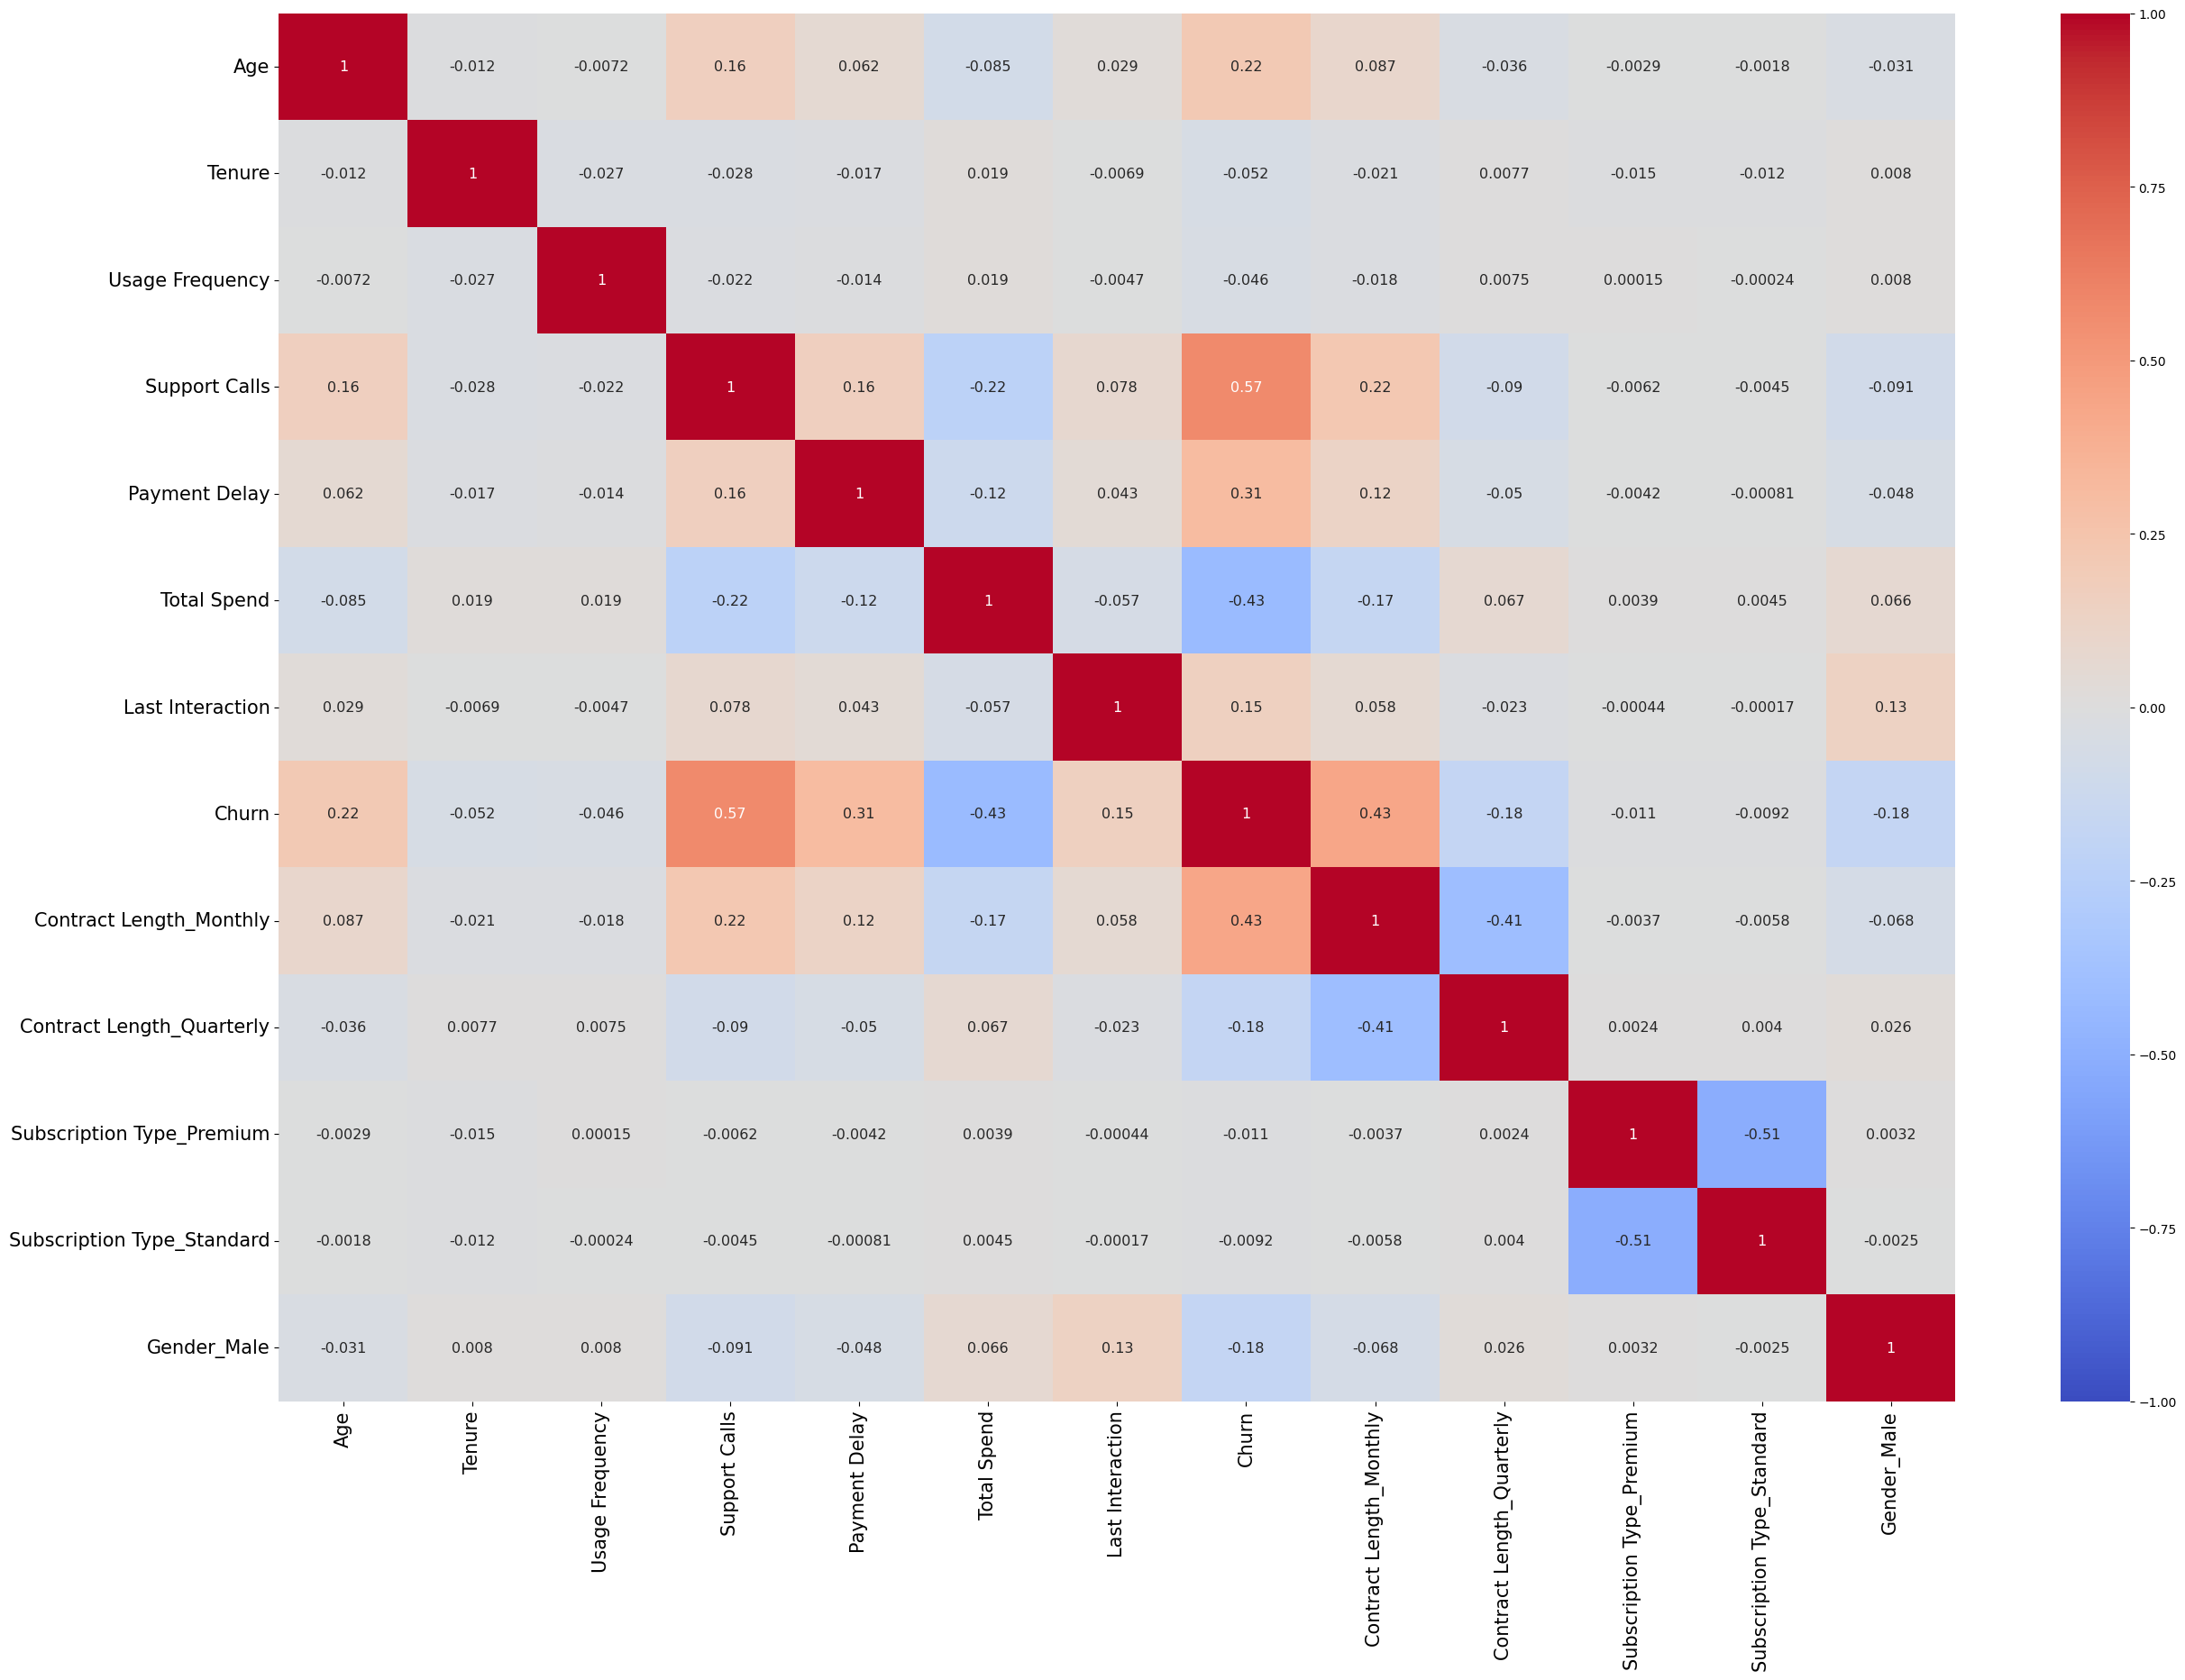

In [34]:
plt.figure(figsize=(30, 20))
sns.heatmap(corrr,
            cmap='coolwarm',  # Color map
            annot=True,  # Annotate with correlation values
            annot_kws={"size": 11.5},  # Set annotation font size
            vmax=1,  # Max value for the color scale
            vmin=-1,  # Min value for the color scale
          )  # Adjust color bar size

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Task 2: **Cost Function**

Figure out the cost function for this problem, whose Log Likelihood you would be maximizing. All the training samples would be considered in this.

( Hint: Dependent Variable can be considered as a normally distributed if enough samples are there. But an important thing is that this Dependent variable is also dependent on other independent variables. Hence, take that in consideration while formulating the cost function.)

Explicity write final function in your report for this Task.

In [35]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, beta):
    n = len(y)
    z = np.dot(X, beta)
    y_hat = sigmoid(z)
    cost = -(1/n) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

def compute_gradient(X, y, beta):
    n = len(y)
    z = np.dot(X, beta)
    y_hat = sigmoid(z)
    gradient = (1/n) * np.dot(X.T, (y_hat - y))
    return gradient


# Task 3: **Gradient Descent Algorithm**
Implement that cost function in your gradient descent algorithm. This time also repeat it for all 3 variants **(Batch, Mini-batch, and Stochastic)**.
Use sufficient number of epochs and a good learning rate as needed for the training.

Hence, you would have 3 versions of your Probability Distribution Function or you can say 3 Models with different *θ*.

In [36]:

def batch_gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history


In [37]:
def mini_batch_gradient_descent(X, y, theta, alpha, epochs, batch_size):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            h = sigmoid(np.dot(X_batch, theta))
            gradient = np.dot(X_batch.T, (h - y_batch)) / batch_size
            theta -= alpha * gradient

        cost = compute_cost( X, y, theta)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history


In [39]:
def stochastic_gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]

            h = sigmoid(np.dot(xi, theta))
            gradient = np.dot(xi.T, (h - yi))
            theta -= alpha * gradient

        cost = compute_cost( X, y,theta)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_df.drop('Churn', axis=1).values)
y_train = train_df['Churn'].values

X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

theta_init = np.zeros(X_train.shape[1])
alpha_values = [0.0001, 0.00001, 0.001, 0.01, 0.1]

epochs = 500
batch_size = 36


In [60]:


def tune_alpha_for_method(X_train, y_train, theta_init, alpha_values, epochs, method, batch_size=None):
    best_alpha = None
    lowest_cost = float('inf')
    cost_results = {}

    for alpha in alpha_values:
        print(f'Tuning with alpha = {alpha}')

        if method == 'batch':
            _, cost_history = batch_gradient_descent(X_train, y_train, theta_init.copy(), alpha, epochs)
        elif method == 'mini_batch':
            _, cost_history = mini_batch_gradient_descent(X_train, y_train, theta_init.copy(), alpha, epochs, batch_size)
        elif method == 'stochastic':
            _, cost_history = stochastic_gradient_descent(X_train, y_train, theta_init.copy(), alpha, epochs)
        else:
            raise ValueError("Method must be 'batch', 'mini_batch', or 'stochastic'")

        final_cost = cost_history[-1]
        cost_results[alpha] = final_cost

        if final_cost < lowest_cost:
            lowest_cost = final_cost
            best_alpha = alpha

    return best_alpha, cost_results


print('Tuning Batch Gradient Descent...')
best_alpha_batch, cost_results_batch = tune_alpha_for_method(X_train, y_train, theta_init, alpha_values, epochs, 'batch')
print(f'Best alpha for Batch Gradient Descent: {best_alpha_batch}')



Tuning Batch Gradient Descent...
Tuning with alpha = 0.0001
Epoch 0: Cost = 0.6931237410374558
Epoch 100: Cost = 0.6907898319035217
Epoch 200: Cost = 0.6884756946852104
Epoch 300: Cost = 0.6861811574572271
Epoch 400: Cost = 0.68390604881996
Tuning with alpha = 1e-05
Epoch 0: Cost = 0.6931448365628196
Epoch 100: Cost = 0.6929105375441008
Epoch 200: Cost = 0.6926764378034647
Epoch 300: Cost = 0.6924425371683328
Epoch 400: Cost = 0.6922088354661705
Tuning with alpha = 0.001
Epoch 0: Cost = 0.6929128302116511
Epoch 100: Cost = 0.6704560305786579
Epoch 200: Cost = 0.6498236872834638
Epoch 300: Cost = 0.6308537775411
Epoch 400: Cost = 0.6133939936159868
Tuning with alpha = 0.01
Epoch 0: Cost = 0.6908081647153385
Epoch 100: Cost = 0.5320980453177653
Epoch 200: Cost = 0.4549497381405692
Epoch 300: Cost = 0.4107027183492265
Epoch 400: Cost = 0.3820881555111143
Tuning with alpha = 0.1
Epoch 0: Cost = 0.6702055688213091
Epoch 100: Cost = 0.31132783089844823
Epoch 200: Cost = 0.2794286952048594
Ep

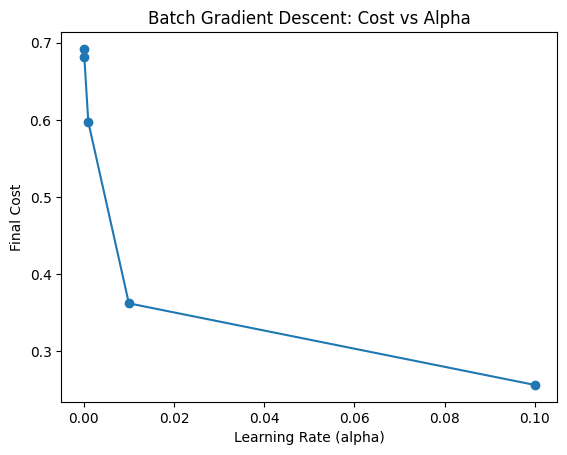

In [61]:
def plot_cost_vs_alpha(cost_results, title):
    alphas = list(cost_results.keys())
    costs = list(cost_results.values())
    plt.plot(alphas, costs, marker='o')
    plt.xlabel('Learning Rate (alpha)')
    plt.ylabel('Final Cost')
    plt.title(title)
    plt.show()


plot_cost_vs_alpha(cost_results_batch, 'Batch Gradient Descent: Cost vs Alpha')

In [44]:
epochs_final = 1000
print(f'Final training with best alphas...')
print('Batch Gradient Descent')
theta_batch_final, cost_history_batch_final = batch_gradient_descent(X_train, y_train, theta_init.copy(), 0.1, epochs_final)


Final training with best alphas...
Batch Gradient Descent
Epoch 0: Cost = 0.6702055688213091
Epoch 100: Cost = 0.31132783089844823
Epoch 200: Cost = 0.2794286952048594
Epoch 300: Cost = 0.26696400949475896
Epoch 400: Cost = 0.26039096851527543
Epoch 500: Cost = 0.25639788123528506
Epoch 600: Cost = 0.25375665616755516
Epoch 700: Cost = 0.25190557279503956
Epoch 800: Cost = 0.2505519995572371
Epoch 900: Cost = 0.24952920611245505


In [63]:

print('Tuning Mini-Batch Gradient Descent...')
best_alpha_mini_batch, cost_results_mini_batch = tune_alpha_for_method(X_train, y_train, theta_init, alpha_values, epochs, 'mini_batch', batch_size)
print(f'Best alpha for Mini-Batch Gradient Descent: {best_alpha_mini_batch}')



Tuning Mini-Batch Gradient Descent...
Tuning with alpha = 0.0001
Epoch 0: Cost = 0.5113409609723945
Epoch 100: Cost = 0.24744863457928393
Epoch 200: Cost = 0.2451228385135004
Epoch 300: Cost = 0.24452085167882948
Epoch 400: Cost = 0.24426128252120732
Tuning with alpha = 1e-05
Epoch 0: Cost = 0.6658871880984619
Epoch 100: Cost = 0.3007531073000365
Epoch 200: Cost = 0.27281784921315705
Epoch 300: Cost = 0.2622255409259014
Epoch 400: Cost = 0.25677156935742773
Tuning with alpha = 0.001
Epoch 0: Cost = 0.30127626767734406
Epoch 100: Cost = 0.2438710054762291
Epoch 200: Cost = 0.2437679124146936
Epoch 300: Cost = 0.24373649739296396
Epoch 400: Cost = 0.24372105525735432
Tuning with alpha = 0.01
Epoch 0: Cost = 0.24750621399906497
Epoch 100: Cost = 0.2437605102621924
Epoch 200: Cost = 0.2437505687037115
Epoch 300: Cost = 0.2437318152094169
Epoch 400: Cost = 0.24375808972665158
Tuning with alpha = 0.1
Epoch 0: Cost = 0.24452721681906425
Epoch 100: Cost = 0.24429334941288283
Epoch 200: Cost = 

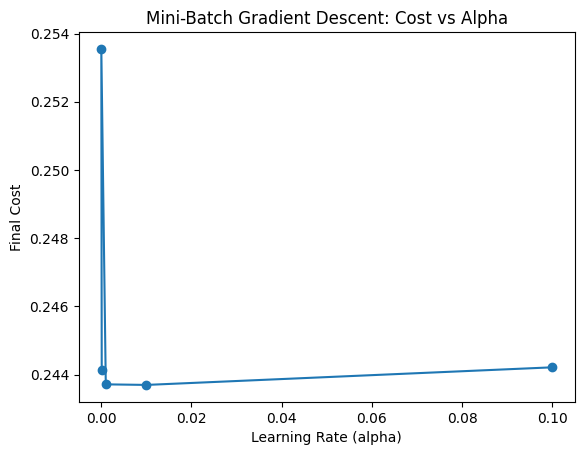

In [64]:

plot_cost_vs_alpha(cost_results_mini_batch, 'Mini-Batch Gradient Descent: Cost vs Alpha')

In [46]:
epochs_final = 1000
print(f'Final training with best alphas...')
print('Mini-Batch Gradient Descent')
theta_mini_batch_final, cost_history_mini_batch_final = mini_batch_gradient_descent(X_train, y_train, theta_init.copy(), 0.01, epochs_final, batch_size)


Final training with best alphas...
Mini-Batch Gradient Descent
Epoch 0: Cost = 0.2475191317812576
Epoch 100: Cost = 0.24375203239966636
Epoch 200: Cost = 0.24372385603149294
Epoch 300: Cost = 0.2437411405942231
Epoch 400: Cost = 0.24371313651378199
Epoch 500: Cost = 0.24373512118086596
Epoch 600: Cost = 0.2437112530019431
Epoch 700: Cost = 0.24370305682979304
Epoch 800: Cost = 0.24373465499250244
Epoch 900: Cost = 0.24370863250448507


In [65]:

print('Tuning Stochastic Gradient Descent...')
best_alpha_sgd, cost_results_sgd = tune_alpha_for_method(X_train, y_train, theta_init, alpha_values, epochs, 'stochastic')
print(f'Best alpha for Stochastic Gradient Descent: {best_alpha_sgd}')

Tuning Stochastic Gradient Descent...
Tuning with alpha = 0.0001
Epoch 0: Cost = 0.39491548395620596
Epoch 100: Cost = 0.3445967468669898
Epoch 200: Cost = 0.3445081178742013
Epoch 300: Cost = 0.3444796041153691
Epoch 400: Cost = 0.3444655619157048
Tuning with alpha = 1e-05
Epoch 0: Cost = 0.36538590691601036
Epoch 100: Cost = 0.246444951663847
Epoch 200: Cost = 0.24603789296013798
Epoch 300: Cost = 0.2459233888076564
Epoch 400: Cost = 0.24587047880702587
Tuning with alpha = 0.001
Epoch 0: Cost = 0.800029115989193
Epoch 100: Cost = 0.783486770039859
Epoch 200: Cost = 0.7834621385388941
Epoch 300: Cost = 0.7834540154207578
Epoch 400: Cost = 0.7834499725368919
Best alpha for Stochastic Gradient Descent: 1e-05


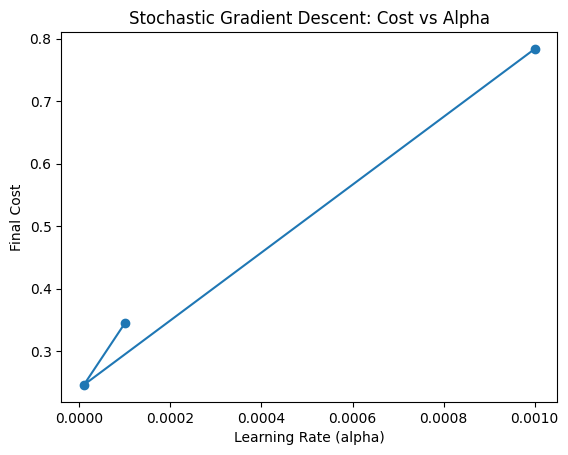

In [66]:
plot_cost_vs_alpha(cost_results_sgd, 'Stochastic Gradient Descent: Cost vs Alpha')


In [42]:
epochs_final = 1000
best_alpha_sgd=1e-05

print('Stochastic Gradient Descent')
theta_sgd_final, cost_history_sgd_final = stochastic_gradient_descent(X_train, y_train, theta_init.copy(), best_alpha_sgd, epochs_final)

Stochastic Gradient Descent
Epoch 0: Cost = 0.36538590691601036
Epoch 100: Cost = 0.246444951663847
Epoch 200: Cost = 0.24603789296013798
Epoch 300: Cost = 0.2459233888076564
Epoch 400: Cost = 0.24587047880702587
Epoch 500: Cost = 0.24584019697910062
Epoch 600: Cost = 0.24582064335007206
Epoch 700: Cost = 0.24580699703318798
Epoch 800: Cost = 0.24579694230428412
Epoch 900: Cost = 0.24578923110637488


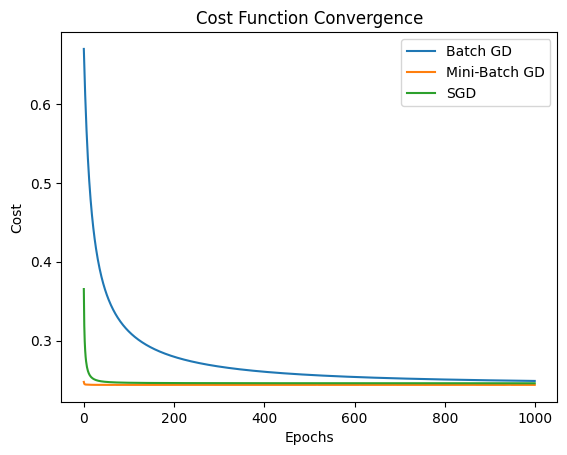

In [47]:
plt.plot(cost_history_batch_final, label="Batch GD")
plt.plot(cost_history_mini_batch_final, label="Mini-Batch GD")
plt.plot(cost_history_sgd_final, label="SGD")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.show()


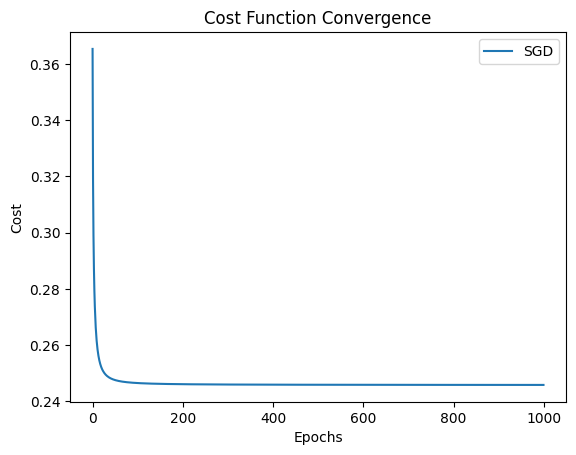

In [48]:
# plt.plot(cost_history_batch_final, label="Batch GD")
# plt.plot(cost_history_mini_batch_final, label="Mini-Batch GD")
plt.plot(cost_history_sgd_final, label="SGD")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.show()


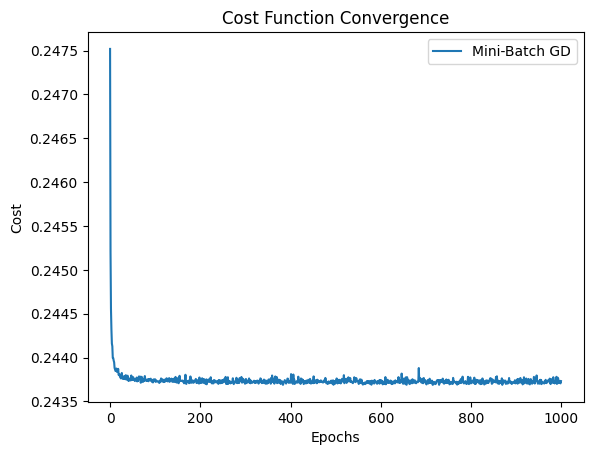

In [49]:
# plt.plot(cost_history_batch_final, label="Batch GD")
plt.plot(cost_history_mini_batch_final, label="Mini-Batch GD")
# plt.plot(cost_history_sgd_final, label="SGD")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.show()


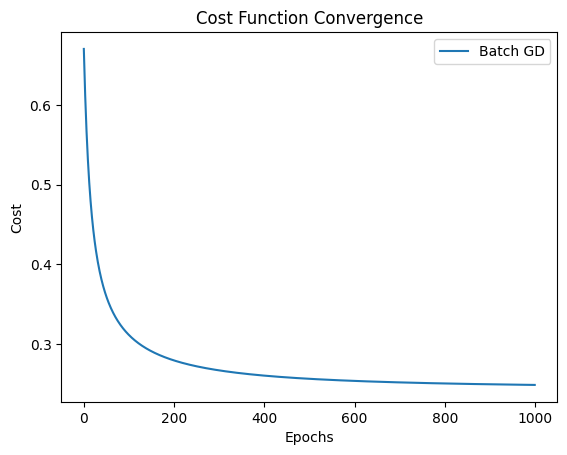

In [50]:
plt.plot(cost_history_batch_final, label="Batch GD")
# plt.plot(cost_history_mini_batch_final, label="Mini-Batch GD")
# plt.plot(cost_history_sgd_final, label="SGD")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.show()


# Task 4: **Testing**

For this task, Test the final 3 versions with Test File given in the dataset. Report all the metrics that are used for a classification problem with all the possible visualization plots.

In [39]:
test_df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Premium,Subscription Type_Standard,Gender_Male
0,22,25,14,4,27,598,9,1,1,0,0,0,0
1,41,28,28,7,13,584,20,0,1,0,0,1,0
2,47,27,10,2,29,757,21,0,0,0,1,0,1
3,35,9,12,5,17,232,18,0,0,1,1,0,1
4,53,58,24,9,2,533,18,0,0,0,0,1,0


In [40]:
X_test = scaler.transform(test_df.drop('Churn', axis=1).values)

In [50]:
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_test = test_df['Churn'].values

In [52]:
def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

y_pred_batch = predict(X_test, theta_batch_final)
y_pred_mini_batch = predict(X_test, theta_mini_batch_final)
y_pred_stochastic = predict(X_test, theta_sgd_final)


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

def print_metrics(y_true, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}")
    print("\n")

print_metrics(y_test, y_pred_batch, "Batch Gradient Descent")
print_metrics(y_test, y_pred_mini_batch, "Mini-Batch Gradient Descent")
print_metrics(y_test, y_pred_stochastic, "Stochastic Gradient Descent")


Metrics for Batch Gradient Descent:
Accuracy: 0.5738
Precision: 0.5267
Recall: 0.9899
F1 Score: 0.6875
ROC AUC: 0.5946
Confusion Matrix: 
[[ 6752 27129]
 [  308 30185]]


Metrics for Mini-Batch Gradient Descent:
Accuracy: 0.5712
Precision: 0.5251
Recall: 0.9906
F1 Score: 0.6864
ROC AUC: 0.5921
Confusion Matrix: 
[[ 6562 27319]
 [  287 30206]]


Metrics for Stochastic Gradient Descent:
Accuracy: 0.5804
Precision: 0.5307
Recall: 0.9878
F1 Score: 0.6904
ROC AUC: 0.6008
Confusion Matrix: 
[[ 7244 26637]
 [  373 30120]]




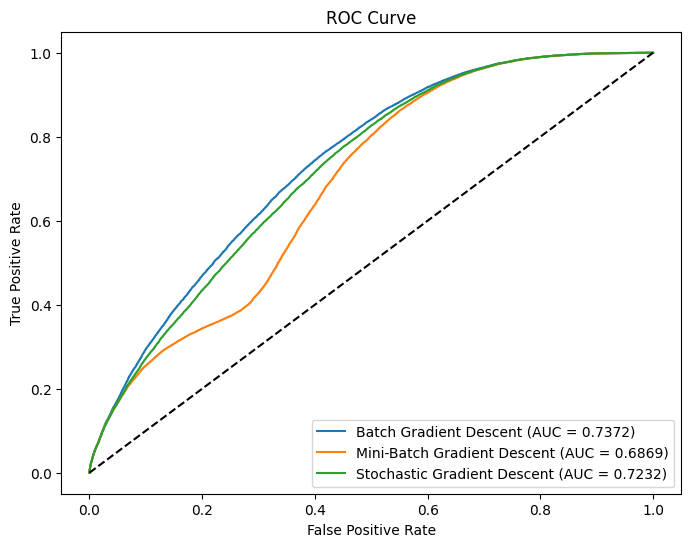

In [56]:
# Plot ROC curve for each model
def plot_roc(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_prob):.4f})')

plt.figure(figsize=(8, 6))
plot_roc(y_test, sigmoid(np.dot(X_test, theta_batch_final)), "Batch Gradient Descent")
plot_roc(y_test, sigmoid(np.dot(X_test, theta_mini_batch_final)), "Mini-Batch Gradient Descent")
plot_roc(y_test, sigmoid(np.dot(X_test, theta_sgd_final)), "Stochastic Gradient Descent")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


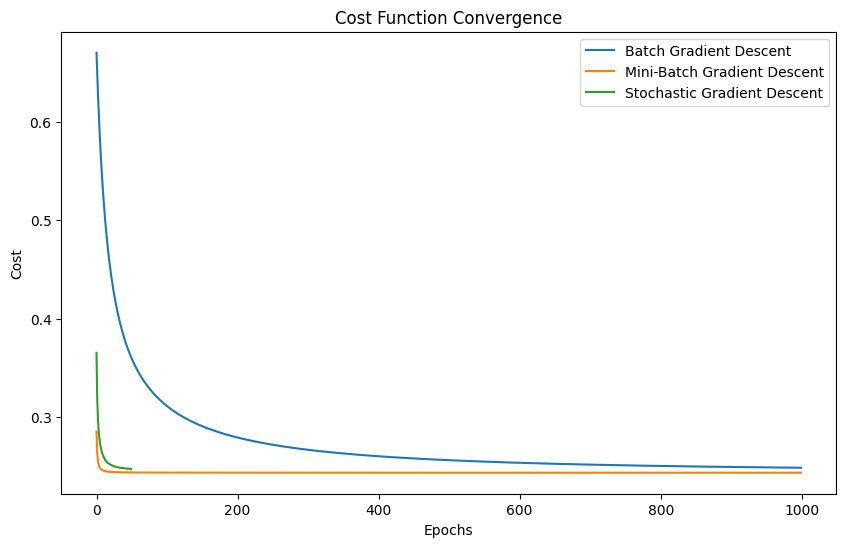

In [57]:
# Plot cost history for each model
plt.figure(figsize=(10, 6))
plt.plot(cost_history_batch_final, label="Batch Gradient Descent")
plt.plot(cost_history_mini_batch_final, label="Mini-Batch Gradient Descent")
plt.plot(cost_history_sgd_final, label="Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()


#**NOTE**
**> Comments in Python code must be present explaining the necessary variables, functions, and**

**> In your Report, content should present or each Task with your observations and a final conclusion**

**> The Report should be made in latex and Tex files should be submitted too**